# Comandos do matplotlib

Para ajudar a manipular e mostrar imagens

In [7]:
import matplotlib.pyplot as plt

plt.close("all")

img = plt.imread("../../DEV/img/barn_mountains.bmp")

img.shape

(297, 400, 3)

# Mostrar imagem

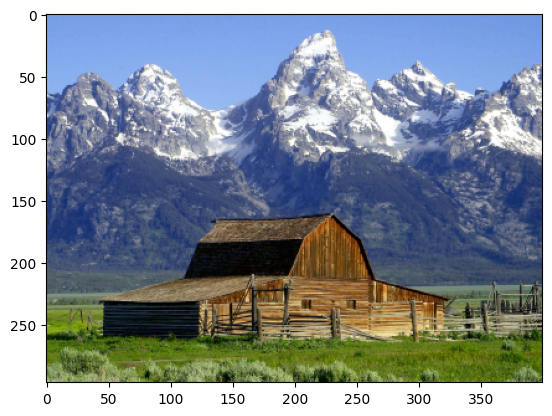

In [8]:
plt.imshow(img)

# Configurar o display da imagem

Text(0.5, 1.0, 'My image')

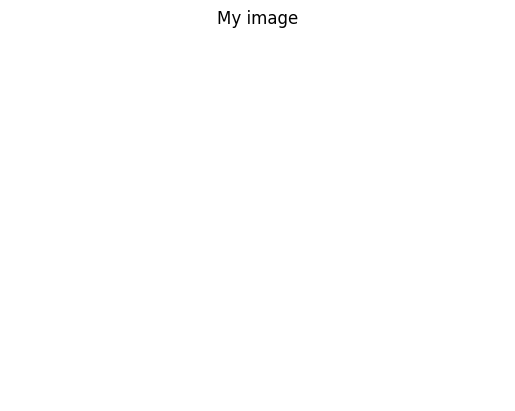

In [9]:
plt.axis("off")
plt.title("My image")

# Mostrar outra imagem

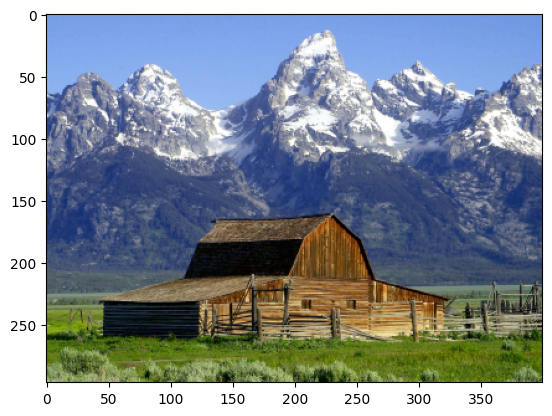

In [10]:
plt.figure()
plt.imshow(img)

# Numpy

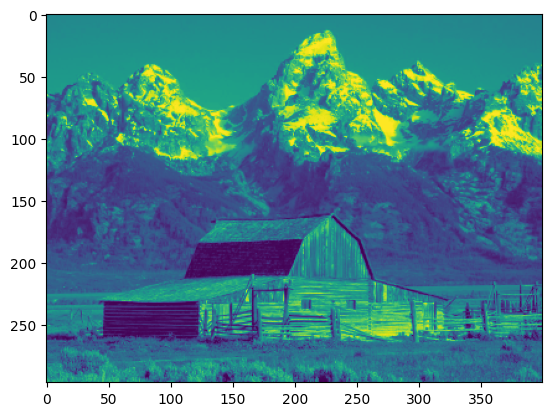

In [11]:
import numpy as np

R = img[:,:,0] # vai buscar o canal vermelho
G = img[:,:,1] # vai buscar o canal verde
B = img[:,:,2] # vai buscar o canal azul

plt.imshow(R)

Foi buscar o canal vermelho mas o default do matplotlib são 3 canais por isso não funcionou.  
Para isso precisamos de isolar o canal usando um colormap.

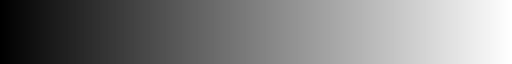

In [12]:
import matplotlib.colors as clr

cmGray = clr.LinearSegmentedColormap.from_list("gray", [(0.0, 0.0, 0.0), (1.0, 1.0, 1.0)], 256)

cmGray

Façamos agora um colormap vermelho, verde e azul:

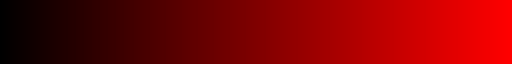

In [13]:
cmRed = clr.LinearSegmentedColormap.from_list("red", [(0.0, 0.0, 0.0), (1.0, 0.0, 0.0)], 256)
cmGreen = clr.LinearSegmentedColormap.from_list("green", [(0.0, 0.0, 0.0), (0.0, 1.0, 0.0)], 256)
cmBlue = clr.LinearSegmentedColormap.from_list("blue", [(0.0, 0.0, 0.0), (0.0, 0.0, 1.0)], 256)

cmRed

Vamos visualizar a imagem com as diferentes cores

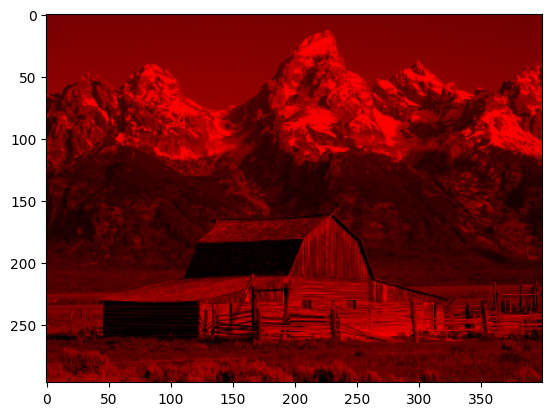

In [14]:
plt.imshow(R, cmRed)

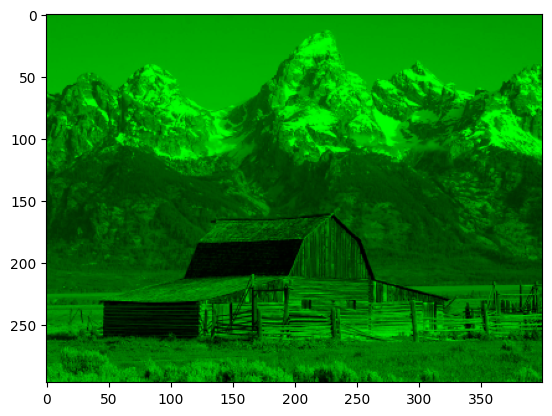

In [15]:
plt.imshow(G, cmGreen)

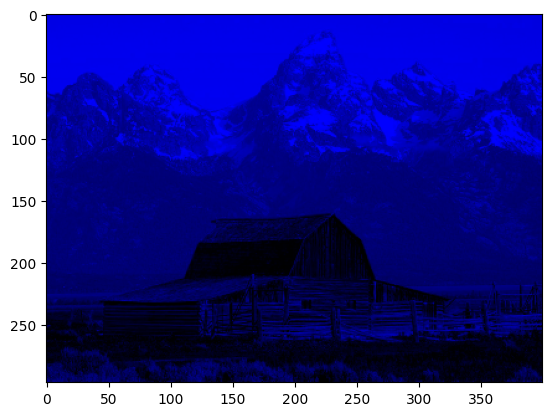

In [16]:
plt.imshow(B, cmBlue)

# Juntar os 3 diferentes canais
Para reconstruir a imagem

In [17]:
[nl, nc, nCh] = img.shape

nl, nc, nCh

(297, 400, 3)

Alocar espaço para uma imagem do tamanho guardado por nl, nc e nCh

In [18]:
imgRec = np.zeros((nl,nc,nCh))

imgRec.shape

(297, 400, 3)

Reconstruir a imagem

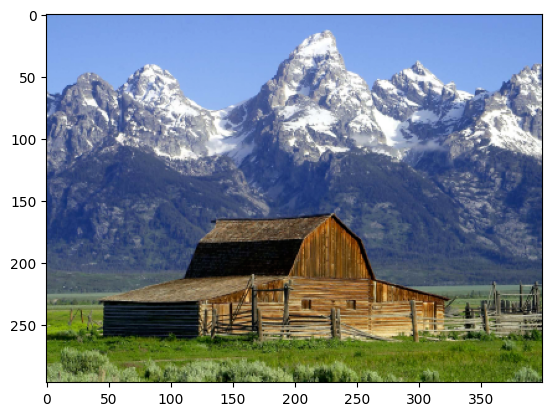

In [19]:
imgRec[:,:,0] = R / 255
imgRec[:,:,1] = G / 255
imgRec[:,:,2] = B / 255

plt.imshow(imgRec)

Padding para a imagem

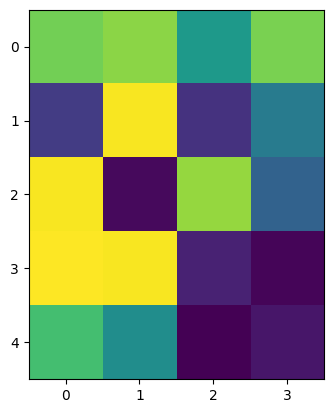

In [20]:
x = np.random.rand(5,4)

plt.imshow(x)

In [21]:
nl, nc = x.shape

nl, nc

(5, 4)

In [22]:
nnl = 8 - nl % 8

nnl

3

Para criar uma linha horizontal para a imagem tem que se criar um novo eixo usando o numpy

In [23]:
ll = x[nl-1, :][np.newaxis, :]

ll.shape

(1, 4)

In [24]:
rep = ll.repeat(nnl, axis=0) # repetir horizontalmente

rep

array([[0.6806589 , 0.47956317, 0.00536576, 0.06270369],
       [0.6806589 , 0.47956317, 0.00536576, 0.06270369],
       [0.6806589 , 0.47956317, 0.00536576, 0.06270369]])

Coloquemos, então, o rep por baixo do x

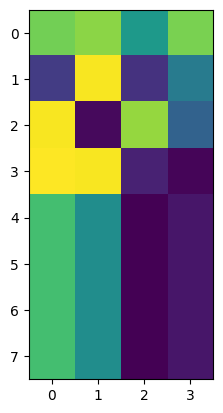

In [25]:
xp = np.vstack([x, rep])

plt.imshow(xp)

Recuperemos a imagem original

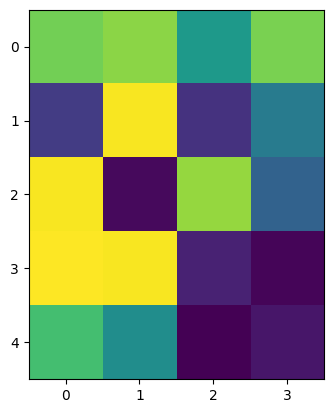

In [26]:
xr = xp[:nl, :nc]

plt.imshow(xr)

Passar para YCbCr

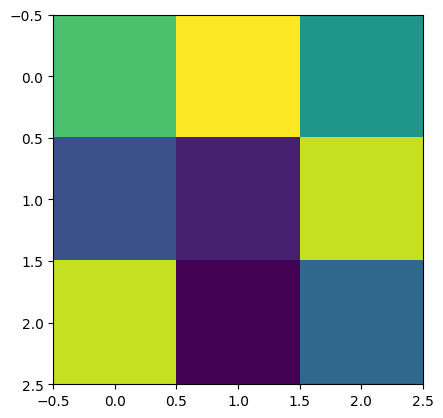

In [27]:
T = np.array(
    [
        [0.299, 0.587, 0.114],
        [-0.168736, -0.331264, 0.5],
        [0.5, -0.418688, -0.081312],
    ]
)

plt.imshow(T)

Calcular as componentes Y, Cb e Cr

In [28]:
Y = T[0,0]*R + T[0,1]*G + T[0,2]*B

Y

array([[152.889, 152.889, 152.889, ..., 146.59 , 146.59 , 146.59 ],
       [152.889, 152.889, 152.889, ..., 146.59 , 146.59 , 146.59 ],
       [152.889, 152.889, 152.889, ..., 146.59 , 148.889, 148.889],
       ...,
       [152.696, 175.653, 131.408, ..., 145.5  ,  90.255, 110.711],
       [167.408, 169.767, 185.793, ..., 110.825,  60.281,  58.264],
       [152.556, 181.821, 169.277, ..., 126.047,  68.563, 133.503]])

In [29]:
Cb = (T[1,0] * R + T[1,1] * G + T[1,2] * B) + 128

Cb

array([[172.080704, 172.080704, 172.080704, ..., 172.24944 , 172.24944 ,
        172.24944 ],
       [172.080704, 172.080704, 172.080704, ..., 172.24944 , 172.24944 ,
        172.24944 ],
       [172.080704, 172.080704, 172.080704, ..., 172.24944 , 172.080704,
        172.080704],
       ...,
       [102.212192, 100.543456, 102.37472 , ..., 102.887136, 104.7184  ,
        106.7184  ],
       [102.37472 , 101.043456, 105.543456, ..., 107.2184  , 109.2184  ,
        112.049664],
       [ 97.212192, 102.705984, 104.705984, ..., 111.043456, 111.880928,
        113.043456]])

In [30]:
Cr = (T[2,0] * R + T[2,1] * G + T[2,2] * B) + 128

Cr

array([[102.4016  , 102.4016  , 102.4016  , ..., 101.9016  , 101.9016  ,
        101.9016  ],
       [102.4016  , 102.4016  , 102.4016  , ..., 101.9016  , 101.9016  ,
        101.9016  ],
       [102.4016  , 102.4016  , 102.4016  , ..., 101.9016  , 102.4016  ,
        102.4016  ],
       ...,
       [121.797408, 122.541344, 122.716096, ..., 119.797408, 119.97216 ,
        119.646912],
       [122.716096, 122.460032, 121.728224, ..., 119.5656  , 119.240352,
        119.25248 ],
       [122.610528, 123.134784, 122.809536, ..., 120.833792, 119.75248 ,
        120.508544]])

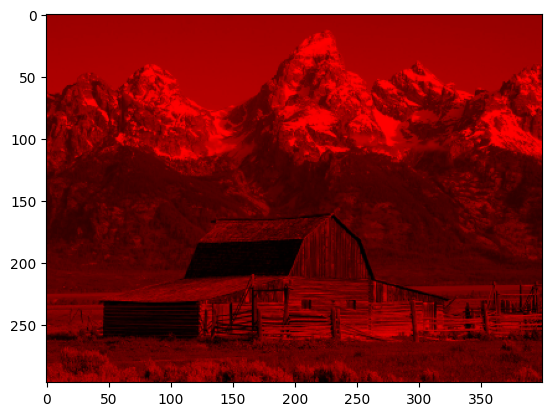

In [38]:
plt.imshow(Y, cmRed)

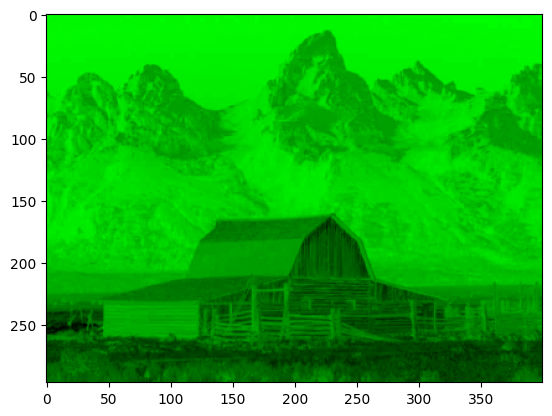

In [41]:
plt.imshow(Cb, cmGreen)

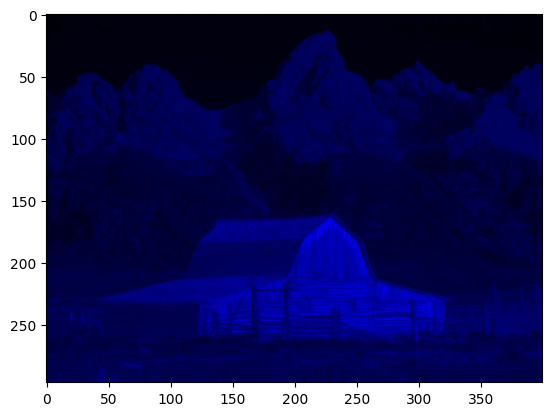

In [42]:
plt.imshow(Cr, cmGray)

In [32]:
Ti = np.linalg.inv(T)

Ti

array([[ 1.00000000e+00, -1.21889419e-06,  1.40199959e+00],
       [ 1.00000000e+00, -3.44135678e-01, -7.14136156e-01],
       [ 1.00000000e+00,  1.77200007e+00,  4.06298063e-07]])

In [34]:
Rrec = Ti[0,0]*Y + Ti[0,1]*(Cb-128) + Ti[0,2]*(Cr-128)
Grec = Ti[1,0]*Y + Ti[1,1]*(Cb-128) + Ti[1,2]*(Cr-128)
Brec = Ti[2,0]*Y + Ti[2,1]*(Cb-128) + Ti[2,2]*(Cr-128)
Rrec[Rrec > 255] = 255
Grec[Grec > 255] = 255
Brec[Brec > 255] = 255

Rrec = np.round(Rrec).astype(np.uint8)
Grec = np.round(Grec).astype(np.uint8)
Brec = np.round(Brec).astype(np.uint8)

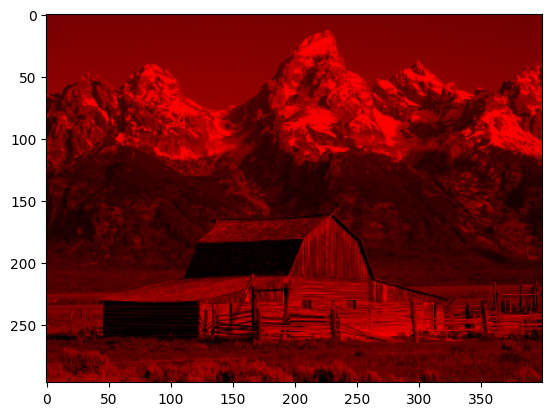

In [35]:
plt.imshow(Rrec, cmRed)

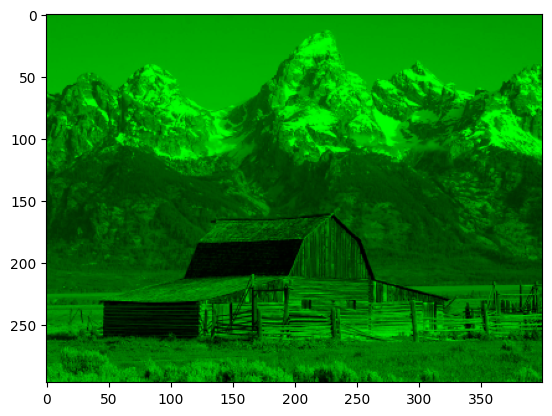

In [36]:
plt.imshow(Grec, cmGreen)

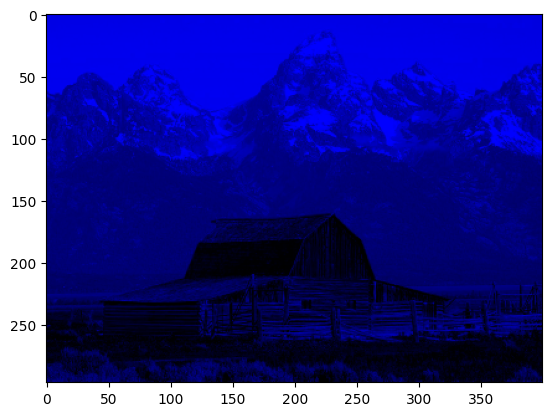

In [37]:
plt.imshow(Brec, cmBlue)